## NowSecure Data Analysis and Visualizations

### 1. Read in the data

In [5]:
# Import necessary packages
import json
import os
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Set the data path and collect all json files

In [6]:
data_path = "Data"
json_list = [f for f in os.listdir(data_path) if f.endswith('.json')]


Read in the data using the json library
- Create a dataframe that stores the app title, overall score, and tasks/vulnerability

In [7]:
apps_vuln_scores = pd.DataFrame()
for json_file in json_list:
    with open(os.path.join(data_path, json_file)) as json_fd:
        json_obj = json.load(json_fd)

    if json_obj and json_obj[0]['assessment']:
        app_row = {}
        app_row['App_Title'] = json_obj[0]['title']
        app_task = json_obj[0]['assessment']['analysis']['task']
        if 'static' in app_task and app_task['static']:
            for static_task_name, static_task in app_task['static']['result'].items():
                if not static_task or 'vulnerable' not in static_task:
                    continue
                app_row[static_task_name] = static_task['vulnerable']

        app_row['Score'] = json_obj[0]['assessment']['report']['score']
        apps_vuln_scores = apps_vuln_scores.append(app_row, ignore_index=True)

apps_vuln_scores


,App_Title,urls_check,janus_check,get_app_files,keysize_check,dirtycow_check,sends_sms_check,debug_flag_check,decode_apk_check,extract_lib_info,...,sqlcipher_key_leakage_check,application_overprivileged_check,auto_generated_screenshots_check,Score,get_yaap_results,address_reference_counting_check,address_space_layout_rand_check,local_auth_check,stack_smashing_protection_check,apkid_check
0,CloudMall - 50% OFF Amazon Prices,True,True,False,False,False,False,False,True,False,...,False,True,False,44.6,NaN,NaN,NaN,NaN,NaN,NaN
1,PGA TOUR Golf Shootout,True,None,False,False,True,False,False,True,False,...,True,False,True,None,NaN,NaN,NaN,NaN,NaN,NaN
2,Night Owl HD,True,NaN,False,True,True,True,False,True,False,...,NaN,True,NaN,46.3,NaN,NaN,NaN,NaN,NaN,NaN
3,Baby Monitor - Babywatcher,True,False,False,True,None,False,False,True,False,...,NaN,True,None,77.2,None,NaN,NaN,NaN,NaN,NaN
4,Logo Maker: Watermark Designer,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.6,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,free monthly calendar app,True,True,False,True,None,False,False,True,False,...,False,False,True,46.3,NaN,NaN,NaN,NaN,NaN,True
77,AncestryDNA - Genetic Testing,True,True,False,False,False,False,False,True,False,...,False,True,True,97.3,NaN,NaN,NaN,NaN,NaN,NaN
78,Mighty Networks,True,True,False,False,False,False,False,True,False,...,False,True,False,85.6,NaN,NaN,NaN,NaN,NaN,NaN
79,4x4 Off-Road Rally 7,True,True,False,True,None,False,False,True,False,...,False,True,True,78.7,NaN,NaN,NaN,NaN,NaN,True


### 2. Clean the data

Initial cleaning of the data
- Drop rows that don't have a result score
- Drop columns that have too many NaNs

In [8]:
apps_vuln_scores = apps_vuln_scores[~apps_vuln_scores['Score'].isnull()]
apps_vuln_scores = apps_vuln_scores.dropna(axis=1, thresh=50)


Rows that got dropped:
- PGA TOUR Golf Shootout
- Smart Card ATR Analyzer
- Epson Print Enabler
- Whale Shark Attack FPS Sniper - Shark Hunting Game
- GTL - Schedule Visits (1 of 2)
- Shadowgun War Games - Online PvP FPS
- Army Toy Men Survival War Shooting Counter OffRoad
- Spectator Judging

Columns that got dropped:
- get_yaap_results
- address_reference_counting_check
- address_space_layout_rand_check
- local_auth_check
- stack_smashing_protection_check
- apkid_check

In [9]:
apps_vuln_scores


,App_Title,urls_check,janus_check,get_app_files,keysize_check,dirtycow_check,sends_sms_check,debug_flag_check,decode_apk_check,extract_lib_info,...,get_reflection_code,secure_random_check,change_cipher_spec_check,certificate_validity_check,dynamic_code_loading_check,javascript_interface_check,sqlcipher_key_leakage_check,application_overprivileged_check,auto_generated_screenshots_check,Score
0,CloudMall - 50% OFF Amazon Prices,True,True,False,False,False,False,False,True,False,...,True,False,False,False,True,True,False,True,False,44.6
2,Night Owl HD,True,NaN,False,True,True,True,False,True,False,...,True,False,NaN,False,False,True,NaN,True,NaN,46.3
3,Baby Monitor - Babywatcher,True,False,False,True,None,False,False,True,False,...,True,True,NaN,False,True,False,NaN,True,None,77.2
4,Logo Maker: Watermark Designer,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,77.6
6,Balls Rollerz Idle 3D Puzzle,True,True,False,False,None,False,False,True,False,...,True,False,False,False,True,True,False,True,True,46.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,free monthly calendar app,True,True,False,True,None,False,False,True,False,...,True,True,False,False,False,True,False,False,True,46.3
77,AncestryDNA - Genetic Testing,True,True,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,True,True,97.3
78,Mighty Networks,True,True,False,False,False,False,False,True,False,...,True,False,False,False,True,True,False,True,False,85.6
79,4x4 Off-Road Rally 7,True,True,False,True,None,False,False,True,False,...,True,True,False,False,False,True,False,True,True,78.7


Drop columns that have no variance
- All columns are True or False

In [10]:
for col in apps_vuln_scores.columns[1:-1]:
    col_set = set(apps_vuln_scores.get(col))
    col_set.discard(np.nan)
    col_set.discard(None)
    if len(col_set) == 1:
        apps_vuln_scores = apps_vuln_scores.drop(col, axis=1)


Columns that got dropped:
- urls_check
- get_app_files
- debug_flag_check
- extract_lib_info
- heartbleed_check
- master_key_check
- get_native_methods
- get_reflection_code
- change_cipher_spec_check
- certificate_validity_check

In [11]:
apps_vuln_scores


,App_Title,janus_check,keysize_check,dirtycow_check,sends_sms_check,decode_apk_check,obfuscation_check,okhttp_vuln_check,allow_backup_check,decompile_apk_check,secure_random_check,dynamic_code_loading_check,javascript_interface_check,sqlcipher_key_leakage_check,application_overprivileged_check,auto_generated_screenshots_check,Score
0,CloudMall - 50% OFF Amazon Prices,True,False,False,False,True,False,False,False,False,False,True,True,False,True,False,44.6
2,Night Owl HD,NaN,True,True,True,True,False,False,True,True,False,False,True,NaN,True,NaN,46.3
3,Baby Monitor - Babywatcher,False,True,None,False,True,False,False,True,True,True,True,False,NaN,True,None,77.2
4,Logo Maker: Watermark Designer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.6
6,Balls Rollerz Idle 3D Puzzle,True,False,None,False,True,False,False,True,False,False,True,True,False,True,True,46.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,free monthly calendar app,True,True,None,False,True,False,False,True,True,True,False,True,False,False,True,46.3
77,AncestryDNA - Genetic Testing,True,False,False,False,True,False,False,False,True,False,False,True,False,True,True,97.3
78,Mighty Networks,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,85.6
79,4x4 Off-Road Rally 7,True,True,None,False,True,False,False,True,True,True,False,True,False,True,True,78.7


Replace nans and Nones with False
- Assume if not documented then it's not a vulnerability

In [12]:
apps_vuln_scores = apps_vuln_scores.replace(np.nan, False)
apps_vuln_scores


,App_Title,janus_check,keysize_check,dirtycow_check,sends_sms_check,decode_apk_check,obfuscation_check,okhttp_vuln_check,allow_backup_check,decompile_apk_check,secure_random_check,dynamic_code_loading_check,javascript_interface_check,sqlcipher_key_leakage_check,application_overprivileged_check,auto_generated_screenshots_check,Score
0,CloudMall - 50% OFF Amazon Prices,True,False,False,False,True,False,False,False,False,False,True,True,False,True,False,44.6
2,Night Owl HD,False,True,True,True,True,False,False,True,True,False,False,True,False,True,False,46.3
3,Baby Monitor - Babywatcher,False,True,False,False,True,False,False,True,True,True,True,False,False,True,False,77.2
4,Logo Maker: Watermark Designer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,77.6
6,Balls Rollerz Idle 3D Puzzle,True,False,False,False,True,False,False,True,False,False,True,True,False,True,True,46.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,free monthly calendar app,True,True,False,False,True,False,False,True,True,True,False,True,False,False,True,46.3
77,AncestryDNA - Genetic Testing,True,False,False,False,True,False,False,False,True,False,False,True,False,True,True,97.3
78,Mighty Networks,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,85.6
79,4x4 Off-Road Rally 7,True,True,False,False,True,False,False,True,True,True,False,True,False,True,True,78.7


Save final dataset into excel for easy viewing

In [13]:
apps_vuln_scores.to_excel('apps_vuln_scores.xlsx')
# Use the following line to read from the excel sheet
# apps_vuln_scores = pd.read_excel('apps_vuln_scores.xlsx', index_col=0)


### 3. Create ML algorithms

Import ML packages

In [14]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


Split data into training (80%) and testing (20%)

In [15]:
X = apps_vuln_scores.drop(['Score', 'App_Title'], axis=1)
y = apps_vuln_scores['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Create function for fitting, scoring, and predicting using the model
- Higher score is better, max score is 1.0

In [16]:
def fit_score_pred(model):
    model.fit(X_train, y_train)
    y_pred = pd.Series(model.predict(X_test), index=y_test.index)
    print('Model score:', r2_score(y_test, y_pred))
    return y_pred


Create function for plotting differences between actual and predicted

In [17]:
def comparison_plot(y_pred):
    plt.scatter(y_test.index, y_test, color='g')
    plt.scatter(y_pred.index, y_pred, color='b')
    for i in y_test.index:
        plt.vlines(x=i, ymin=y_test[i], ymax=y_pred[i], colors='red')
    plt.show()
    print('Blue: Predicted, Green: Actual')


Create function for creating comparison chart once models are created

In [18]:
def comparison_chart(y_pred):
    y_comp = pd.DataFrame(y_test)
    y_comp.insert(0, 'App_Title', apps_vuln_scores['App_Title'])
    y_comp.insert(2, 'Pred', y_pred)
    return y_comp


Run on a LinearRegression model

Model score: -0.027122669846145087


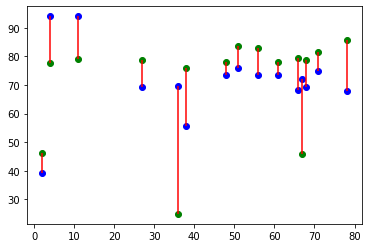

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
67,Auto Photo Cut Paste,45.7,72.256748
71,Aceable Drivers Ed,81.7,74.779162
2,Night Owl HD,46.3,39.232087
36,US Divorce Single Parents Meet,24.9,69.804903
61,Idle Supermarket Tycoon - Tiny Shop Game,78.0,73.438953
51,Calendly: Meeting Scheduling App,83.7,76.080592
48,Video Maker,78.0,73.438953
56,"Poster Maker, Flyers, Banner, Logo Ads Page De...",83.1,73.438953
27,Hootsuite: Schedule Posts for Twitter & Instagram,78.7,69.271307
78,Mighty Networks,85.6,67.742364


In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
y_pred = fit_score_pred(lin_reg)
comparison_plot(y_pred)
comparison_chart(y_pred)


Run on an SVM model
- Played around with some of the hyperparameters since the model was so accurate

Model score: -0.2000468037295744


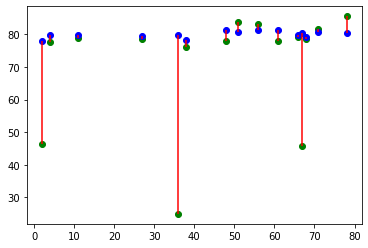

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
67,Auto Photo Cut Paste,45.7,80.329757
71,Aceable Drivers Ed,81.7,80.645324
2,Night Owl HD,46.3,77.896453
36,US Divorce Single Parents Meet,24.9,79.983935
61,Idle Supermarket Tycoon - Tiny Shop Game,78.0,81.320532
51,Calendly: Meeting Scheduling App,83.7,80.904064
48,Video Maker,78.0,81.320532
56,"Poster Maker, Flyers, Banner, Logo Ads Page De...",83.1,81.320532
27,Hootsuite: Schedule Posts for Twitter & Instagram,78.7,79.663717
78,Mighty Networks,85.6,80.486303


In [20]:
from sklearn.svm import SVR
svr = SVR()
y_pred = fit_score_pred(svr)
comparison_plot(y_pred)
comparison_chart(y_pred)


Run on a Decision Tree model

Model score: -1.1566162830792655


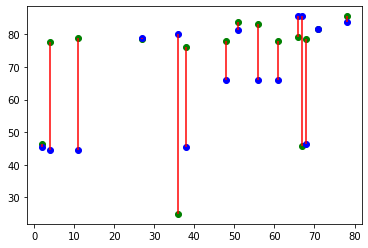

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
67,Auto Photo Cut Paste,45.7,85.60
71,Aceable Drivers Ed,81.7,81.70
2,Night Owl HD,46.3,45.40
36,US Divorce Single Parents Meet,24.9,80.10
61,Idle Supermarket Tycoon - Tiny Shop Game,78.0,65.95
51,Calendly: Meeting Scheduling App,83.7,81.30
48,Video Maker,78.0,65.95
56,"Poster Maker, Flyers, Banner, Logo Ads Page De...",83.1,65.95
27,Hootsuite: Schedule Posts for Twitter & Instagram,78.7,79.00
78,Mighty Networks,85.6,83.70


In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
y_pred = fit_score_pred(dtr)
comparison_plot(y_pred)
comparison_chart(y_pred)


### 4. Dimensionality Reduction

Remove columns with low variance

In [22]:
apps_vuln_scores_pca = apps_vuln_scores.copy()
for col in apps_vuln_scores_pca.columns[1:-1]:
    if min(apps_vuln_scores_pca[col].value_counts()) < 5:
        apps_vuln_scores_pca = apps_vuln_scores_pca.drop(col, axis=1)


Columns that got dropped:
- sends_sms_check
- decode_apk_check
- obfuscation_check
- okhttp_vuln_check
- get_reflection_code
- sqlcipher_key_leakage_check

In [23]:
apps_vuln_scores_pca


,App_Title,janus_check,keysize_check,dirtycow_check,allow_backup_check,decompile_apk_check,secure_random_check,dynamic_code_loading_check,javascript_interface_check,application_overprivileged_check,auto_generated_screenshots_check,Score
0,CloudMall - 50% OFF Amazon Prices,True,False,False,False,False,False,True,True,True,False,44.6
2,Night Owl HD,False,True,True,True,True,False,False,True,True,False,46.3
3,Baby Monitor - Babywatcher,False,True,False,True,True,True,True,False,True,False,77.2
4,Logo Maker: Watermark Designer,False,False,False,False,False,False,False,False,False,False,77.6
6,Balls Rollerz Idle 3D Puzzle,True,False,False,True,False,False,True,True,True,True,46.3
...,...,...,...,...,...,...,...,...,...,...,...,...
76,free monthly calendar app,True,True,False,True,True,True,False,True,False,True,46.3
77,AncestryDNA - Genetic Testing,True,False,False,False,True,False,False,True,True,True,97.3
78,Mighty Networks,True,False,False,True,False,False,True,True,True,False,85.6
79,4x4 Off-Road Rally 7,True,True,False,True,True,True,False,True,True,True,78.7


Save X and y sets

In [24]:
X_pca = apps_vuln_scores_pca.drop(['Score', 'App_Title'], axis=1)
y_pca = apps_vuln_scores_pca['Score']


Use PCA as a method to reduce dimensionality

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_pca)
X_pca = pca.transform(X_pca)
X_pca


array([[ 0.18453909, -0.99422522,  0.42550981, -0.08221559, -0.3017849 ,
         0.09026625],
       [ 1.00644537,  0.85023737, -0.09371039,  0.78073904, -0.37322725,
        -0.07905953],
       [ 0.8902021 ,  0.18122369, -0.00327081,  0.593872  ,  1.34921962,
         0.10207431],
       [ 1.262461  , -0.78896375, -0.46986422, -0.19220344, -0.24971986,
         0.91139514],
       [-0.77047693, -0.54584407, -0.05394674,  0.29062512, -0.24639335,
         0.0474836 ],
       [ 0.90023047,  0.19798733, -0.68629805,  0.32495729, -0.39588027,
        -0.26195824],
       [ 0.88278536, -0.56049597,  1.01535224,  0.5670304 , -0.17056975,
         0.23865152],
       [ 1.262461  , -0.78896375, -0.46986422, -0.19220344, -0.24971986,
         0.91139514],
       [ 1.0884393 , -0.55771676, -0.0724588 , -0.33720664,  1.08024852,
         0.14552627],
       [-0.79366433, -0.40219867, -0.08264892,  0.4491336 , -0.36928374,
         0.05000992],
       [-0.1112905 ,  0.30670692,  1.0078214 , -0.

### 5. Update ML algorithms to use PCA data

Split data into training (80%) and testing (20%)

In [26]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2)


Create function for fitting, scoring, and predicting using the model
- Higher score is better, max score is 1.0

In [27]:
def fit_score_pred_pca(model):
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = pd.Series(model.predict(X_test_pca), index=y_test_pca.index)
    print('PCA Model score:', r2_score(y_test_pca, y_pred_pca))
    return y_pred_pca


Create function for plotting differences between actual and predicted

In [28]:
def comparison_plot_pca(y_pred_pca):
    plt.scatter(y_test_pca.index, y_test_pca, color='g')
    plt.scatter(y_pred_pca.index, y_pred_pca, color='b')
    for i in y_test_pca.index:
        plt.vlines(x=i, ymin=y_test_pca[i], ymax=y_pred_pca[i], colors='red')
    plt.show()
    print('Blue: Predicted, Green: Actual')


Create function for creating comparison chart once models are created

In [29]:
def comparison_chart_pca(y_pred_pca):
    y_comp_pca = pd.DataFrame(y_test_pca)
    y_comp_pca.insert(0, 'App_Title', apps_vuln_scores_pca['App_Title'])
    y_comp_pca.insert(2, 'Pred', y_pred_pca)
    return y_comp_pca


Run on a LinearRegression model

PCA Model score: -0.04646394724969527


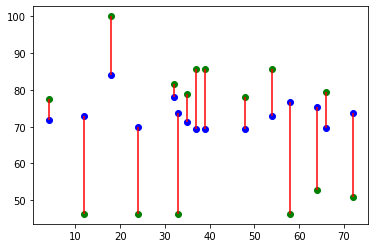

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
37,Extreme Car Driving Simulator,85.6,69.346819
4,Logo Maker: Watermark Designer,77.6,71.931583
35,AlertMedia,79.0,71.266346
54,Just Get Ten - Get 10 Number Puzzle Offline Games,85.6,72.854231
48,Video Maker,78.0,69.346819
39,"Intro Maker - Game Intro, Outro, Video Templates",85.6,69.346819
32,"TIDAL Music - Hifi Songs, Playlists, & Videos",81.7,78.104365
66,Hungry Shark Evolution - Offline survival game,79.3,69.514330
72,Lifetime Movie Club,50.8,73.826374
12,My Run Tracker - The Run Tracking App,46.3,72.896849


In [30]:
from sklearn.linear_model import LinearRegression
lin_reg_pca = LinearRegression()
y_pred_pca = fit_score_pred_pca(lin_reg_pca)
comparison_plot_pca(y_pred_pca)
comparison_chart_pca(y_pred_pca)


Run on an SVM model
- Played around with some of the hyperparameters since the model was so accurate

PCA Model score: -0.34308886884406964


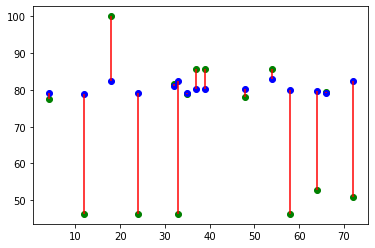

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
37,Extreme Car Driving Simulator,85.6,80.362199
4,Logo Maker: Watermark Designer,77.6,79.100355
35,AlertMedia,79.0,79.102338
54,Just Get Ten - Get 10 Number Puzzle Offline Games,85.6,82.825946
48,Video Maker,78.0,80.362199
39,"Intro Maker - Game Intro, Outro, Video Templates",85.6,80.362199
32,"TIDAL Music - Hifi Songs, Playlists, & Videos",81.7,80.948861
66,Hungry Shark Evolution - Offline survival game,79.3,79.044447
72,Lifetime Movie Club,50.8,82.300969
12,My Run Tracker - The Run Tracking App,46.3,78.774722


In [31]:
from sklearn.svm import SVR
svr_pca = SVR()
y_pred_pca = fit_score_pred_pca(svr_pca)
comparison_plot_pca(y_pred_pca)
comparison_chart_pca(y_pred_pca)


Run on an ElasticNet model

PCA Model score: -0.001450266837230929


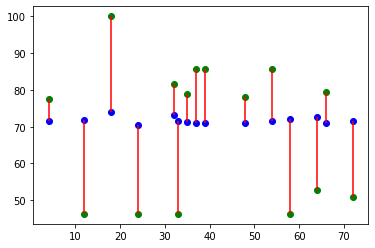

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
37,Extreme Car Driving Simulator,85.6,71.020246
4,Logo Maker: Watermark Designer,77.6,71.648218
35,AlertMedia,79.0,71.245836
54,Just Get Ten - Get 10 Number Puzzle Offline Games,85.6,71.662681
48,Video Maker,78.0,71.020246
39,"Intro Maker - Game Intro, Outro, Video Templates",85.6,71.020246
32,"TIDAL Music - Hifi Songs, Playlists, & Videos",81.7,73.285041
66,Hungry Shark Evolution - Offline survival game,79.3,70.920922
72,Lifetime Movie Club,50.8,71.654680
12,My Run Tracker - The Run Tracking App,46.3,71.894347


In [32]:
from sklearn.linear_model import ElasticNet
elastic_net_pca = ElasticNet()
y_pred_pca = fit_score_pred_pca(elastic_net_pca)
comparison_plot_pca(y_pred_pca)
comparison_chart_pca(y_pred_pca)


Run on a Decision Tree model

PCA Model score: -0.674274296139181


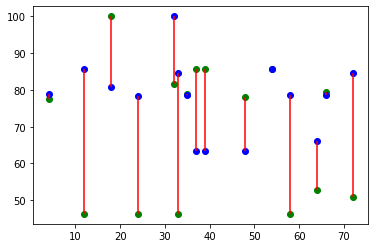

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
37,Extreme Car Driving Simulator,85.6,63.425
4,Logo Maker: Watermark Designer,77.6,79.000
35,AlertMedia,79.0,78.700
54,Just Get Ten - Get 10 Number Puzzle Offline Games,85.6,85.600
48,Video Maker,78.0,63.425
39,"Intro Maker - Game Intro, Outro, Video Templates",85.6,63.425
32,"TIDAL Music - Hifi Songs, Playlists, & Videos",81.7,100.000
66,Hungry Shark Evolution - Offline survival game,79.3,78.700
72,Lifetime Movie Club,50.8,84.650
12,My Run Tracker - The Run Tracking App,46.3,85.600


In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr_pca = DecisionTreeRegressor()
y_pred_pca = fit_score_pred_pca(dtr_pca)
comparison_plot_pca(y_pred_pca)
comparison_chart_pca(y_pred_pca)


Run on a Neural Network

PCA Model score: -0.7403329239848706


/Users/sanjitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


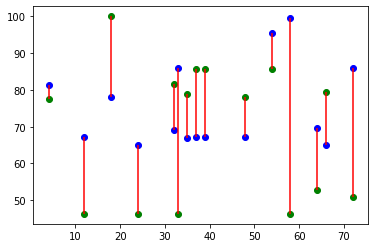

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
37,Extreme Car Driving Simulator,85.6,67.066635
4,Logo Maker: Watermark Designer,77.6,81.193237
35,AlertMedia,79.0,66.960416
54,Just Get Ten - Get 10 Number Puzzle Offline Games,85.6,95.566788
48,Video Maker,78.0,67.066635
39,"Intro Maker - Game Intro, Outro, Video Templates",85.6,67.066635
32,"TIDAL Music - Hifi Songs, Playlists, & Videos",81.7,69.070508
66,Hungry Shark Evolution - Offline survival game,79.3,65.079198
72,Lifetime Movie Club,50.8,86.057053
12,My Run Tracker - The Run Tracking App,46.3,67.199763


In [34]:
from sklearn.neural_network import MLPRegressor
neural_net_pca = MLPRegressor(solver='sgd', alpha=.0001,
                          hidden_layer_sizes=(10, 10,))
y_pred_pca = fit_score_pred_pca(neural_net_pca)
comparison_plot_pca(y_pred_pca)
comparison_chart_pca(y_pred_pca)


### 6. Selecting the best algorithm

Since normal linear regression on the reduced data worked the best, we will select this model
- If the winner was a different algorithm, here is where we would tune the model
  - Linear regression cannot really be tuned, so we leave it how it is!
- Seems like dimensionality reduction helped us in this case

PCA Model score: -0.04646394724969527


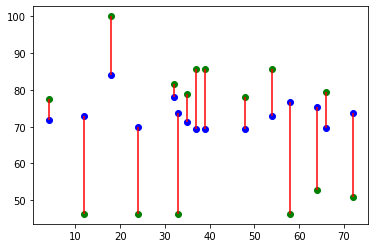

Blue: Predicted, Green: Actual


,App_Title,Score,Pred
37,Extreme Car Driving Simulator,85.6,69.346819
4,Logo Maker: Watermark Designer,77.6,71.931583
35,AlertMedia,79.0,71.266346
54,Just Get Ten - Get 10 Number Puzzle Offline Games,85.6,72.854231
48,Video Maker,78.0,69.346819
39,"Intro Maker - Game Intro, Outro, Video Templates",85.6,69.346819
32,"TIDAL Music - Hifi Songs, Playlists, & Videos",81.7,78.104365
66,Hungry Shark Evolution - Offline survival game,79.3,69.514330
72,Lifetime Movie Club,50.8,73.826374
12,My Run Tracker - The Run Tracking App,46.3,72.896849


In [35]:
y_pred_pca = fit_score_pred_pca(lin_reg_pca)
comparison_plot_pca(y_pred_pca)
comparison_chart_pca(y_pred_pca)